In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

animal_classes = ['bird','cat','deer','dog','frog','horse']
animal_ids = [class_names.index(a) for a in animal_classes]

train_mask = np.isin(y_train.flatten(), animal_ids)
test_mask = np.isin(y_test.flatten(), animal_ids)

x_train = x_train[train_mask]
y_train = y_train[train_mask]
x_test = x_test[test_mask]
y_test = y_test[test_mask]


In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

label_map = {animal_ids[i]: i for i in range(len(animal_ids))}

y_train = np.array([label_map[int(y)] for y in y_train])
y_test = np.array([label_map[int(y)] for y in y_test])


/tmp/ipython-input-82196021.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train = np.array([label_map[int(y)] for y in y_train])
/tmp/ipython-input-82196021.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_test = np.array([label_map[int(y)] for y in y_test])


In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(animal_classes), activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [11]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 40ms/step - accuracy: 0.4834 - loss: 1.3303 - val_accuracy: 0.5580 - val_loss: 1.1787
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.5654 - loss: 1.1489 - val_accuracy: 0.5957 - val_loss: 1.0813
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 39ms/step - accuracy: 0.6026 - loss: 1.0488 - val_accuracy: 0.6308 - val_loss: 0.9907
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.6254 - loss: 0.9896 - val_accuracy: 0.6512 - val_loss: 0.9464
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 41ms/step - accuracy: 0.6525 - loss: 0.9330 - val_accuracy: 0.6552 - val_loss: 0.9323


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


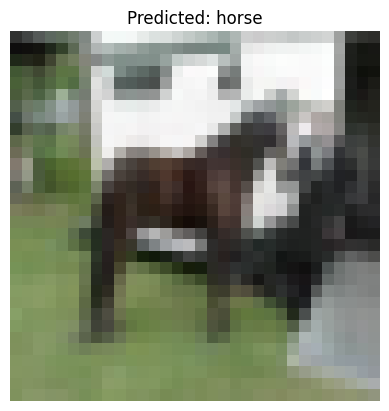

In [12]:
index = 10
img = x_test[index]

prediction = model.predict(img.reshape(1,32,32,3))
predicted_class = animal_classes[np.argmax(prediction)]

plt.imshow(img)
plt.title("Predicted: " + predicted_class)
plt.axis('off')
plt.show()
